# Project 2

### In this project i will perform all the Data Cleaning approach and then decide in which ML algo it fits

In [1]:
# import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [19]:
dataset = pd.read_csv('customer_churn_2000.csv')
dataset.head(3)

,CustomerID,Age,Gender,MonthlySpend,SubscriptionLength,IsActive,LastLogin,Churned
0,C0001,56,Male,93.82,47,True,342,No
1,C0002,46,Male,22.43,43,True,248,No
2,C0003,32,Male,42.82,44,False,211,Yes


In [20]:
dataset.describe(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          2000 non-null   object 
 1   Age                 2000 non-null   int64  
 2   Gender              2000 non-null   object 
 3   MonthlySpend        2000 non-null   float64
 4   SubscriptionLength  2000 non-null   int64  
 5   IsActive            2000 non-null   bool   
 6   LastLogin           2000 non-null   int64  
 7   Churned             2000 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 111.5+ KB


(              Age  MonthlySpend  SubscriptionLength    LastLogin
 count  2000.00000   2000.000000         2000.000000  2000.000000
 mean     41.31650     50.230235           29.865000   180.039000
 std      13.46566     20.011047           17.253626   105.943827
 min      18.00000    -17.740000            1.000000     0.000000
 25%      30.00000     36.132500           15.000000    87.000000
 50%      42.00000     50.465000           29.500000   178.000000
 75%      53.00000     64.435000           45.000000   271.000000
 max      64.00000    119.920000           59.000000   364.000000,
 None)

## Check the Null and FillNa

In [21]:
dataset.isnull().sum() 

# in this dataset there is no need of fillna

CustomerID            0
Age                   0
Gender                0
MonthlySpend          0
SubscriptionLength    0
IsActive              0
LastLogin             0
Churned               0
dtype: int64

## Encoding the categorical data (Using Label Encoding)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
dataset['Gender'] = LE.fit_transform(dataset[['Gender']])
dataset['IsActive'] = LE.fit_transform(dataset[['IsActive']])
dataset['Churned'] = LE.fit_transform(dataset[['Churned']])
dataset.head(5)

# it convert Male =1, Female =0, True = 1, False =0, NO = 0, Yes =1

d:\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,CustomerID,Age,Gender,MonthlySpend,SubscriptionLength,IsActive,LastLogin,Churned
0,C0001,56,1,93.82,47,1,342,0
1,C0002,46,1,22.43,43,1,248,0
2,C0003,32,1,42.82,44,0,211,1
3,C0004,60,1,54.64,9,1,152,0
4,C0005,25,0,44.55,13,0,157,1


In [35]:
# remove the CustomerId that is not relevant 

dataset.drop('CustomerID', axis=1, inplace=True)

## Outliers Finding

In [36]:
features = dataset.iloc[:, :-1]
features

,Age,Gender,MonthlySpend,SubscriptionLength,IsActive,LastLogin
0,56,1,93.82,47,1,342
1,46,1,22.43,43,1,248
2,32,1,42.82,44,0,211
3,60,1,54.64,9,1,152
4,25,0,44.55,13,0,157
...,...,...,...,...,...,...
1995,42,0,17.77,50,1,281
1996,37,0,54.17,25,1,42
1997,19,0,46.81,2,0,109
1998,56,0,103.56,57,1,209


In [ ]:
# create a graph to see the outliers using boxplot

plt.figure(figsize=(30, 45))

for i, col in enumerate(features.columns):
    plt.subplot(7, 4, i + 1)
    sns.boxenplot(x= dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Finding the outliers for all the Features', fontsize=16)
plt.show()


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\4151629216.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\4151629216.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col])
C:\Users\Jeetendra\AppData\Local\Tem

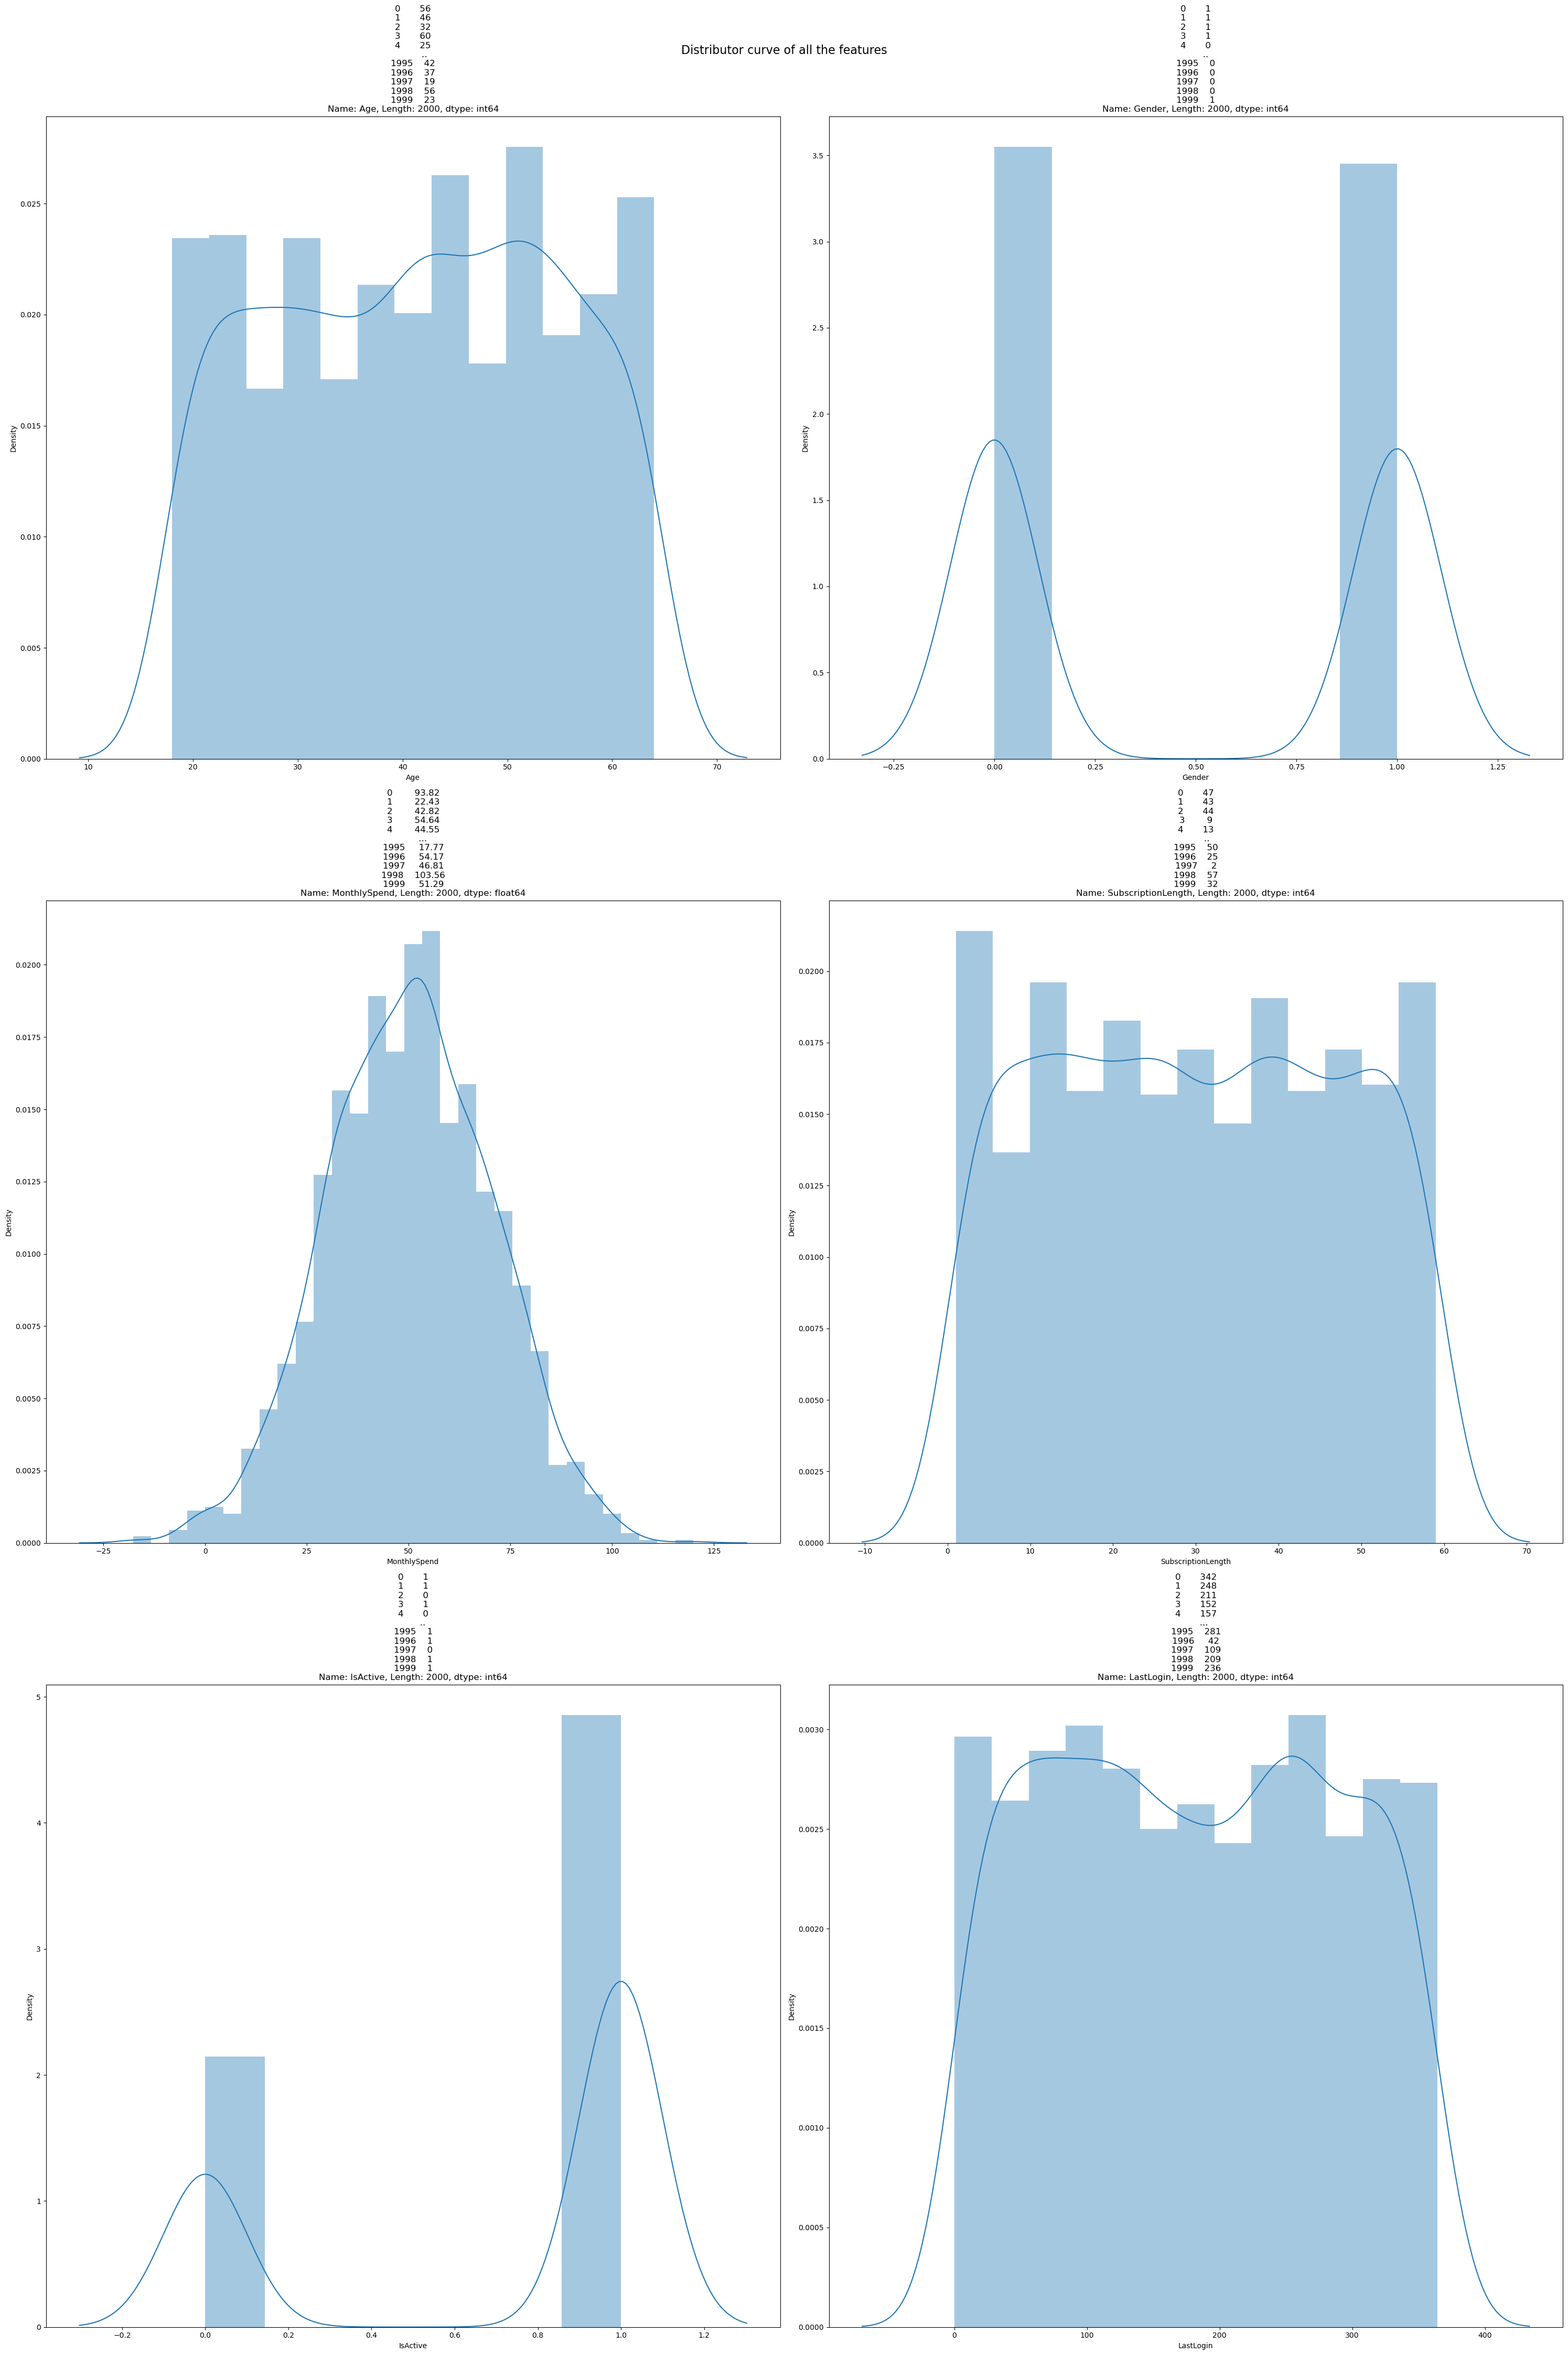

In [41]:
# now plot the distplot to show the distribution curve so we could decide which technique to use to remove the outliers

plt.figure(figsize=(30,45))

for i, col in enumerate(features.columns):
    plt.subplot(3, 2, i+1)
    sns.distplot(dataset[col])
    plt.title(dataset[col])
    plt.tight_layout()

plt.suptitle('Distributor curve of all the features', fontsize=16)
plt.show()

## In the above graph you could see the distribution is not normal so we'll use Z-Score

**Formula:**

The Z-Score for a data point \( X \) is calculated as:

$
Z = \frac{X - \mu}{\sigma}
$

Where:
- $( X $) = Individual data point
- $( \mu $) = Mean of the dataset
- $( \sigma $) = Standard deviation of the dataset


In [47]:
# get the z-score
import numpy as np

dataset_clean = dataset.copy()
for i, col in enumerate(features.columns):

    # z-score
    z_scores = (dataset_clean[col] - dataset_clean[col].mean())/ dataset_clean[col].std()
    dataset_clean = dataset_clean[(np.abs(z_scores) < 3)]

dataset.shape, dataset_clean.shape

((2000, 7), (1997, 7))

In [48]:
dataset_clean.head(5)

,Age,Gender,MonthlySpend,SubscriptionLength,IsActive,LastLogin,Churned
0,56,1,93.82,47,1,342,0
1,46,1,22.43,43,1,248,0
2,32,1,42.82,44,0,211,1
3,60,1,54.64,9,1,152,0
4,25,0,44.55,13,0,157,1


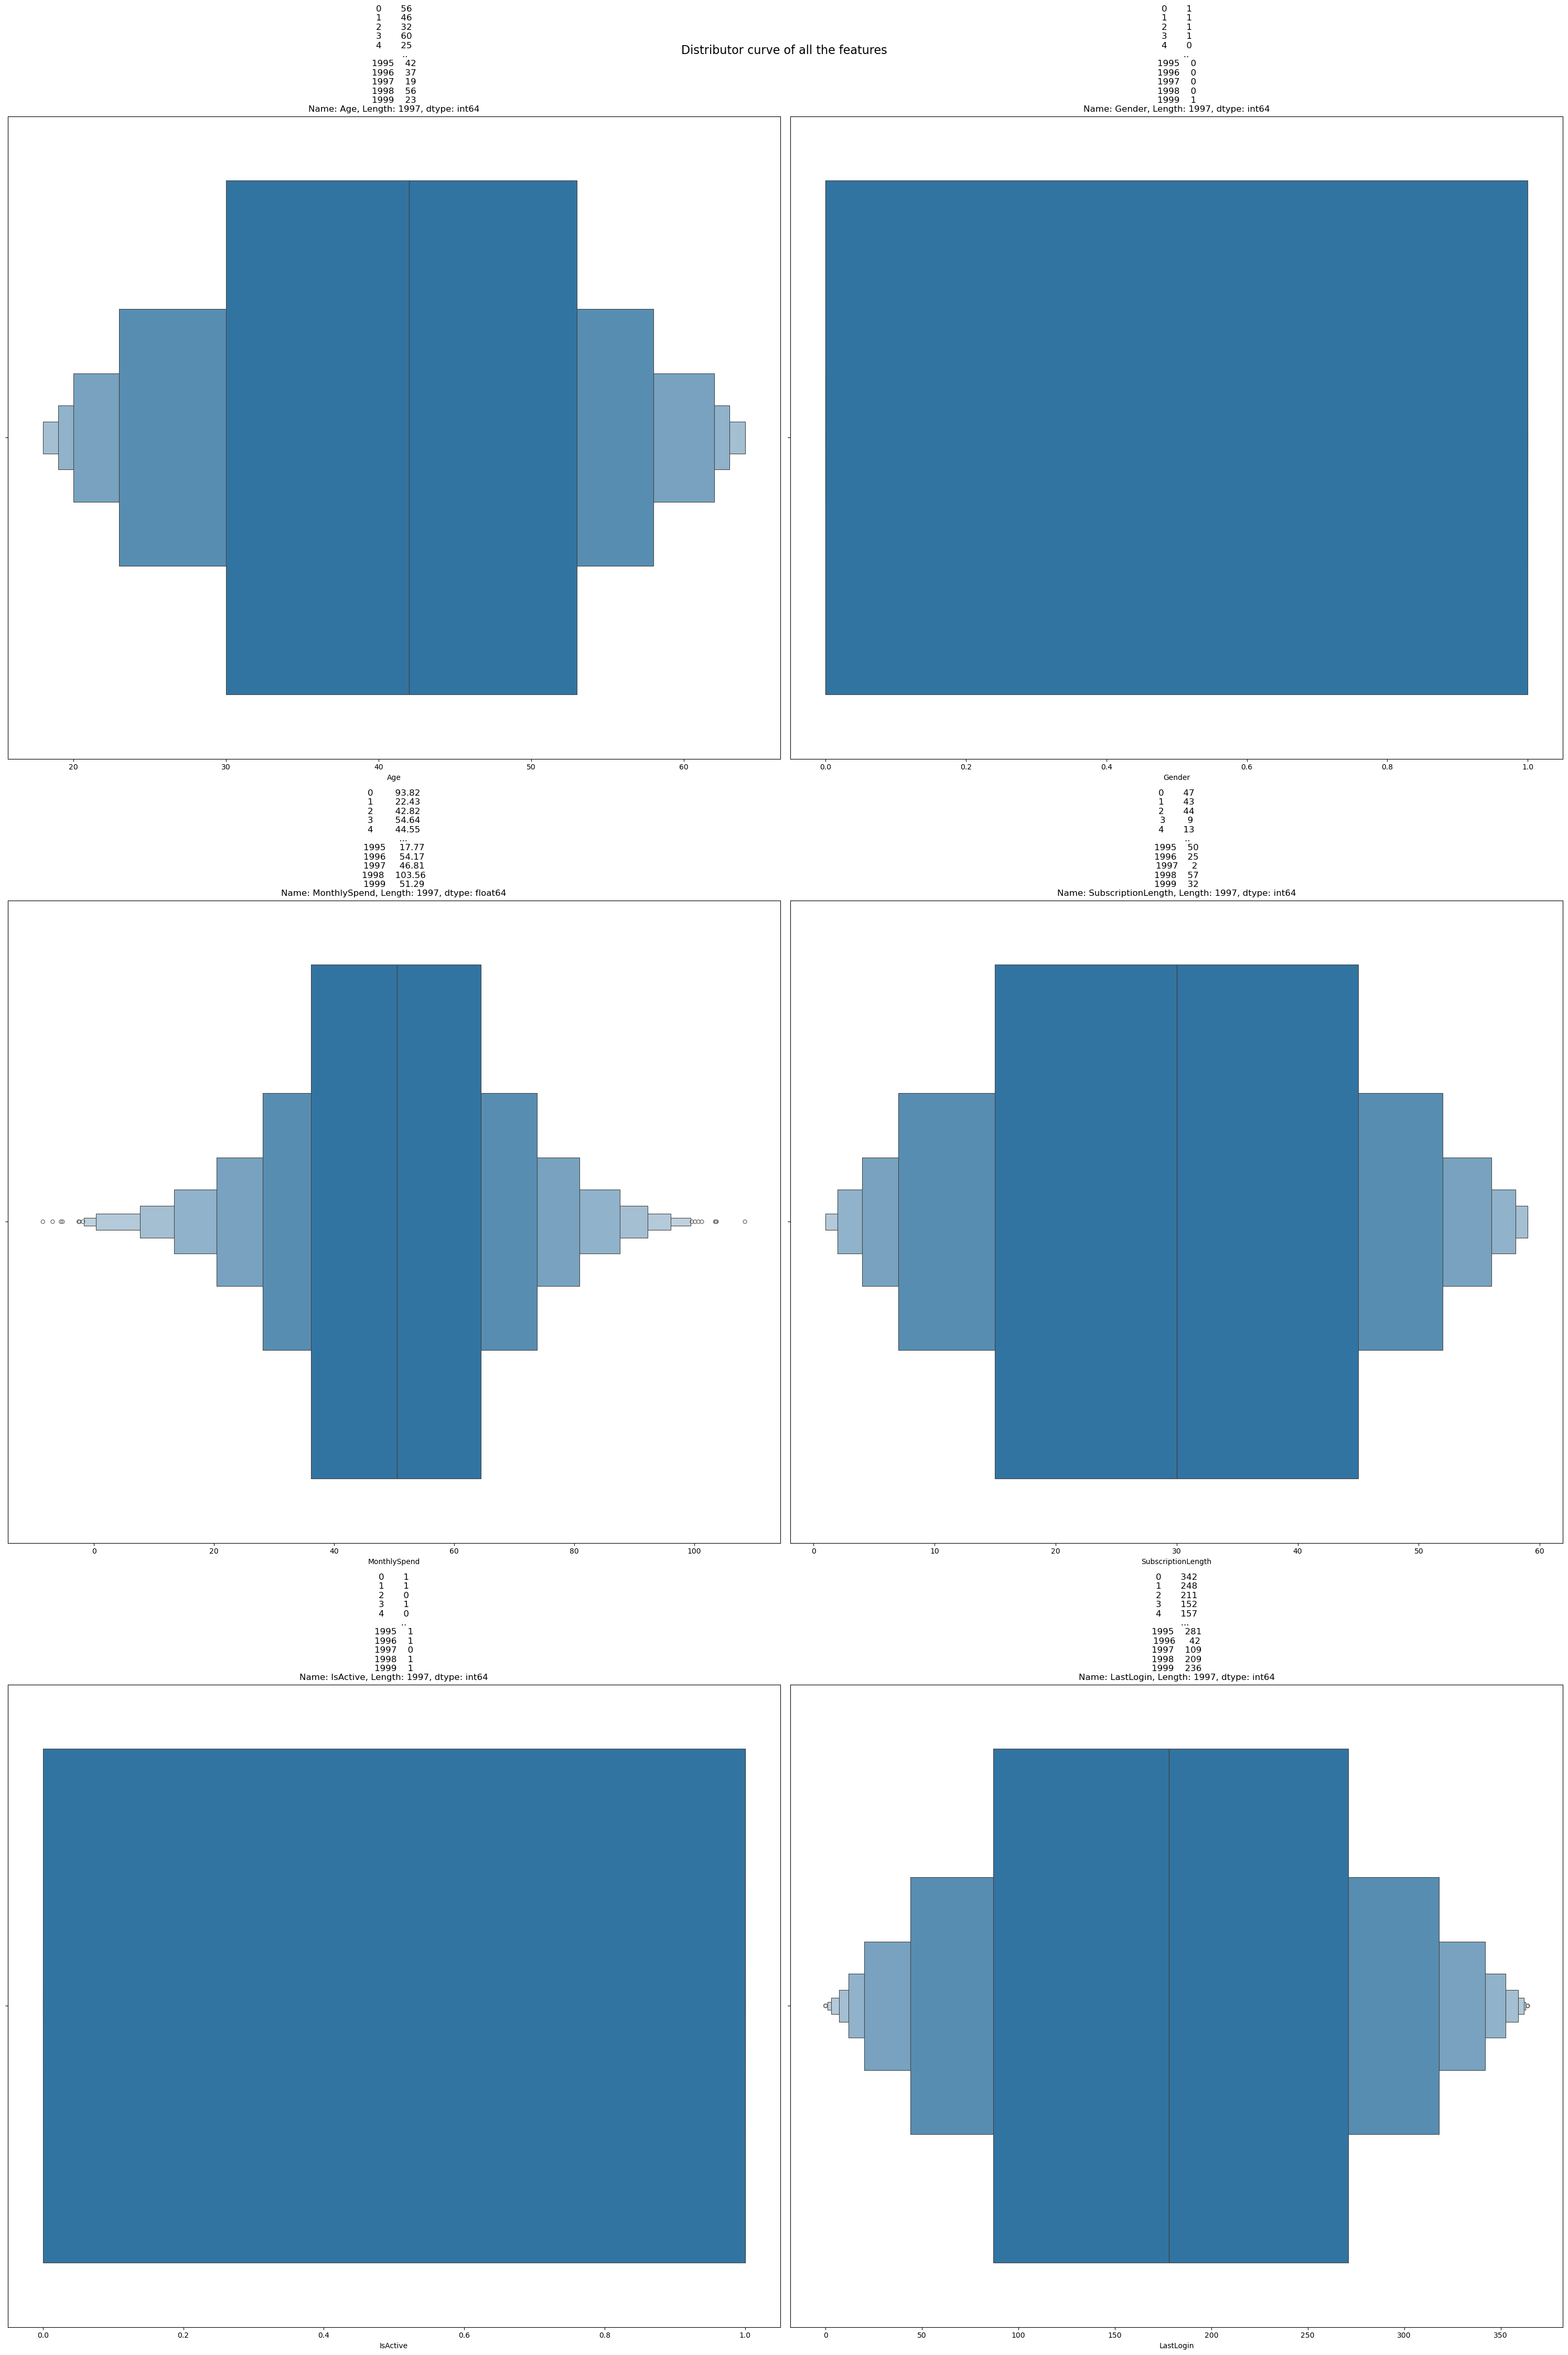

In [50]:
# now plot the distplot to show after outlier removal

plt.figure(figsize=(30,45))

for i, col in enumerate(features.columns):
    plt.subplot(3, 2, i+1)
    sns.boxenplot(x=dataset_clean[col])
    plt.title(dataset_clean[col])
    plt.tight_layout()

plt.suptitle('Distributor curve of all the features', fontsize=16)
plt.show()

## Feature Scaling (Using Min-Max Scaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [54]:
normalize_data = min_max_scaler.fit_transform(dataset_clean)
normalize_dataset = pd.DataFrame(normalize_data, columns= dataset_clean.columns)
normalize_dataset.head(5)

,Age,Gender,MonthlySpend,SubscriptionLength,IsActive,LastLogin,Churned
0,0.826087,1.0,0.875128,0.793103,1.0,0.939560,0.0
1,0.608696,1.0,0.264540,0.724138,1.0,0.681319,0.0
2,0.304348,1.0,0.438933,0.741379,0.0,0.579670,1.0
3,0.913043,1.0,0.540027,0.137931,1.0,0.417582,0.0
4,0.152174,0.0,0.453729,0.206897,0.0,0.431319,1.0


## Remove Duplicates

In [57]:
# check the duplicates

normalize_dataset.duplicated().sum()

#we no have any duplicate in this dataset, otherwise we need to remove those or fill those

# removing the duplicates
normalize_dataset.drop_duplicates(keep="first", inplace=True)
normalize_dataset.shape

(1997, 7)

## Data Transformation

In [67]:
# first check the dataset
normalize_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1997 non-null   float64
 1   Gender              1997 non-null   float64
 2   MonthlySpend        1997 non-null   float64
 3   SubscriptionLength  1997 non-null   float64
 4   IsActive            1997 non-null   float64
 5   LastLogin           1997 non-null   float64
 6   Churned             1997 non-null   float64
dtypes: float64(7)
memory usage: 109.3 KB


In [68]:
# transform data type

normalize_dataset['Age'] = dataset['Age'].astype('float64')

## Function Transformation

In [69]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer()

In [75]:
# transform function so data will normally distribute

for col in normalize_dataset.columns[:-1]:
    print(col)
    normalize_dataset[col] = ft.fit_transform(normalize_dataset[[col]])

Age
Gender
MonthlySpend
SubscriptionLength
IsActive
LastLogin


In [72]:
normalize_dataset.head(5)

,Age,Gender,MonthlySpend,SubscriptionLength,IsActive,LastLogin,Churned
0,56.0,1.0,0.875128,0.793103,1.0,0.939560,0.0
1,46.0,1.0,0.264540,0.724138,1.0,0.681319,0.0
2,32.0,1.0,0.438933,0.741379,0.0,0.579670,1.0
3,60.0,1.0,0.540027,0.137931,1.0,0.417582,0.0
4,25.0,0.0,0.453729,0.206897,0.0,0.431319,1.0


Age


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\2476574806.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalize_dataset[col])


Gender


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\2476574806.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalize_dataset[col])


MonthlySpend


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\2476574806.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalize_dataset[col])


SubscriptionLength


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\2476574806.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalize_dataset[col])


IsActive


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\2476574806.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalize_dataset[col])


LastLogin


C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_4692\2476574806.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalize_dataset[col])


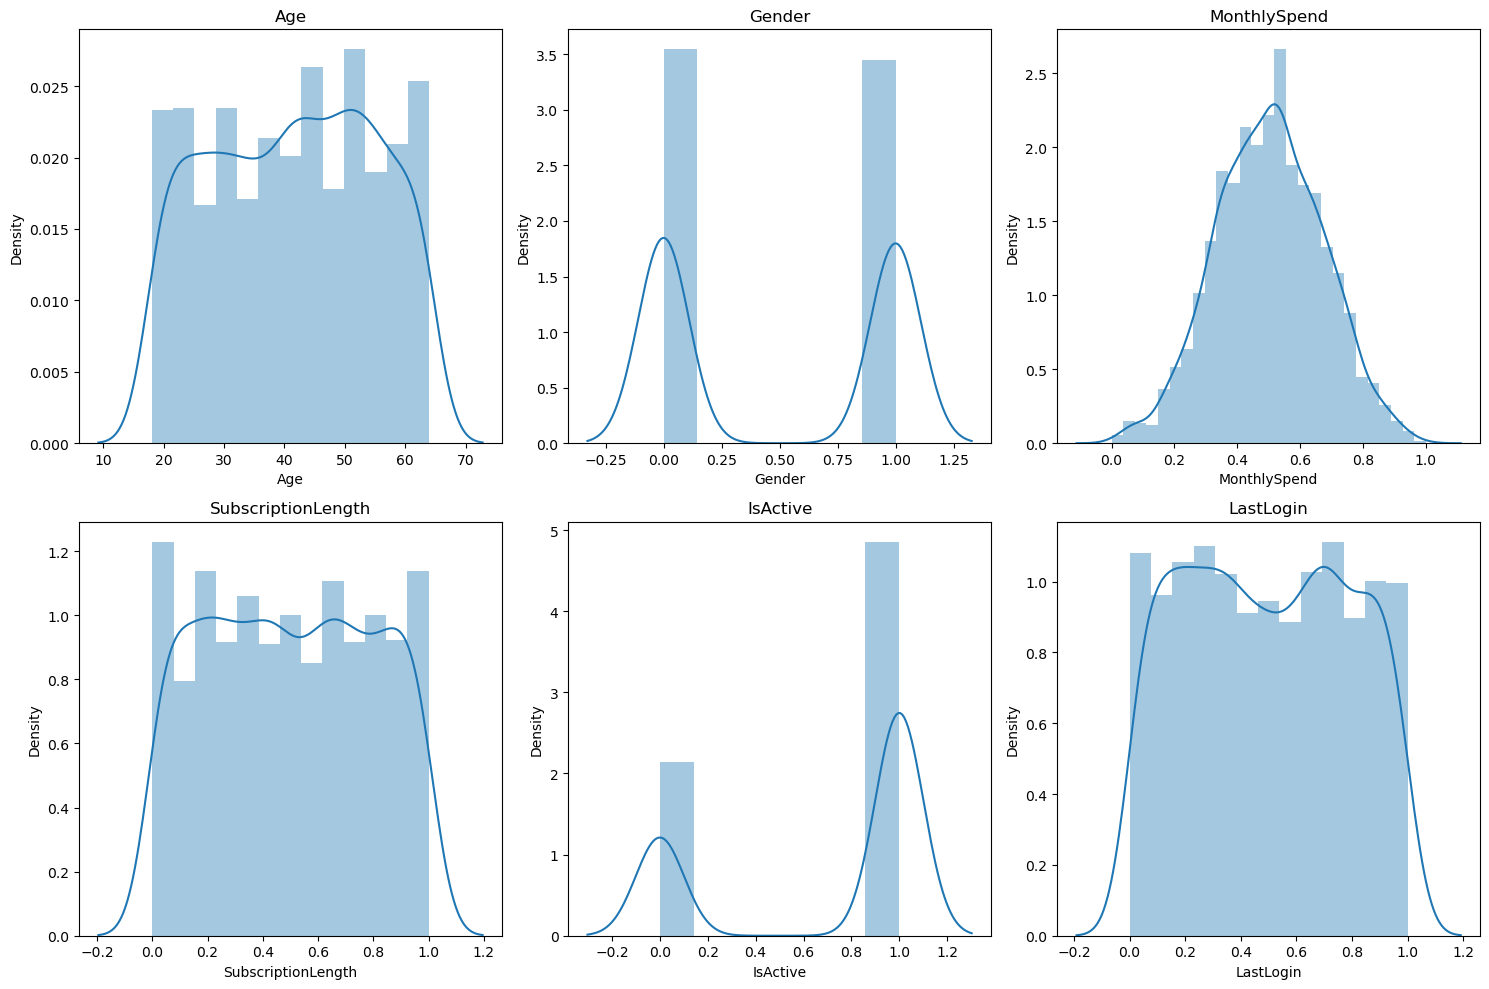

In [85]:
# now check the graph

plt.figure(figsize=(15,10))

for i, col in enumerate(normalize_dataset.columns[:-1]):
    print(col)
    plt.subplot(2, 3, i +1)
    sns.distplot(normalize_dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

## Feature Selection

In [86]:
# check the null in db

normalize_dataset.isnull().sum()

Age                   0
Gender                0
MonthlySpend          0
SubscriptionLength    0
IsActive              0
LastLogin             0
Churned               0
dtype: int64

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [99]:
# input and output variables 

x = normalize_dataset.iloc[:,:-1]
y = normalize_dataset['Churned']

normalize_dataset.shape, x.shape, y.shape

((1997, 7), (1997, 6), (1997,))

In [100]:
fs = SequentialFeatureSelector(LogisticRegression(), k_features=(normalize_dataset.shape[1] - 1), forward=True )
fs.fit(x, y)
fs.k_score_

0.9864761904761906

In [103]:
# check the features

fs.k_feature_names_ 

# it show all features are required in this dataset, otherwise we will keep only features that it provide

('Age',
 'Gender',
 'MonthlySpend',
 'SubscriptionLength',
 'IsActive',
 'LastLogin')

## Graph ( That tell use which ML algo we need to use)

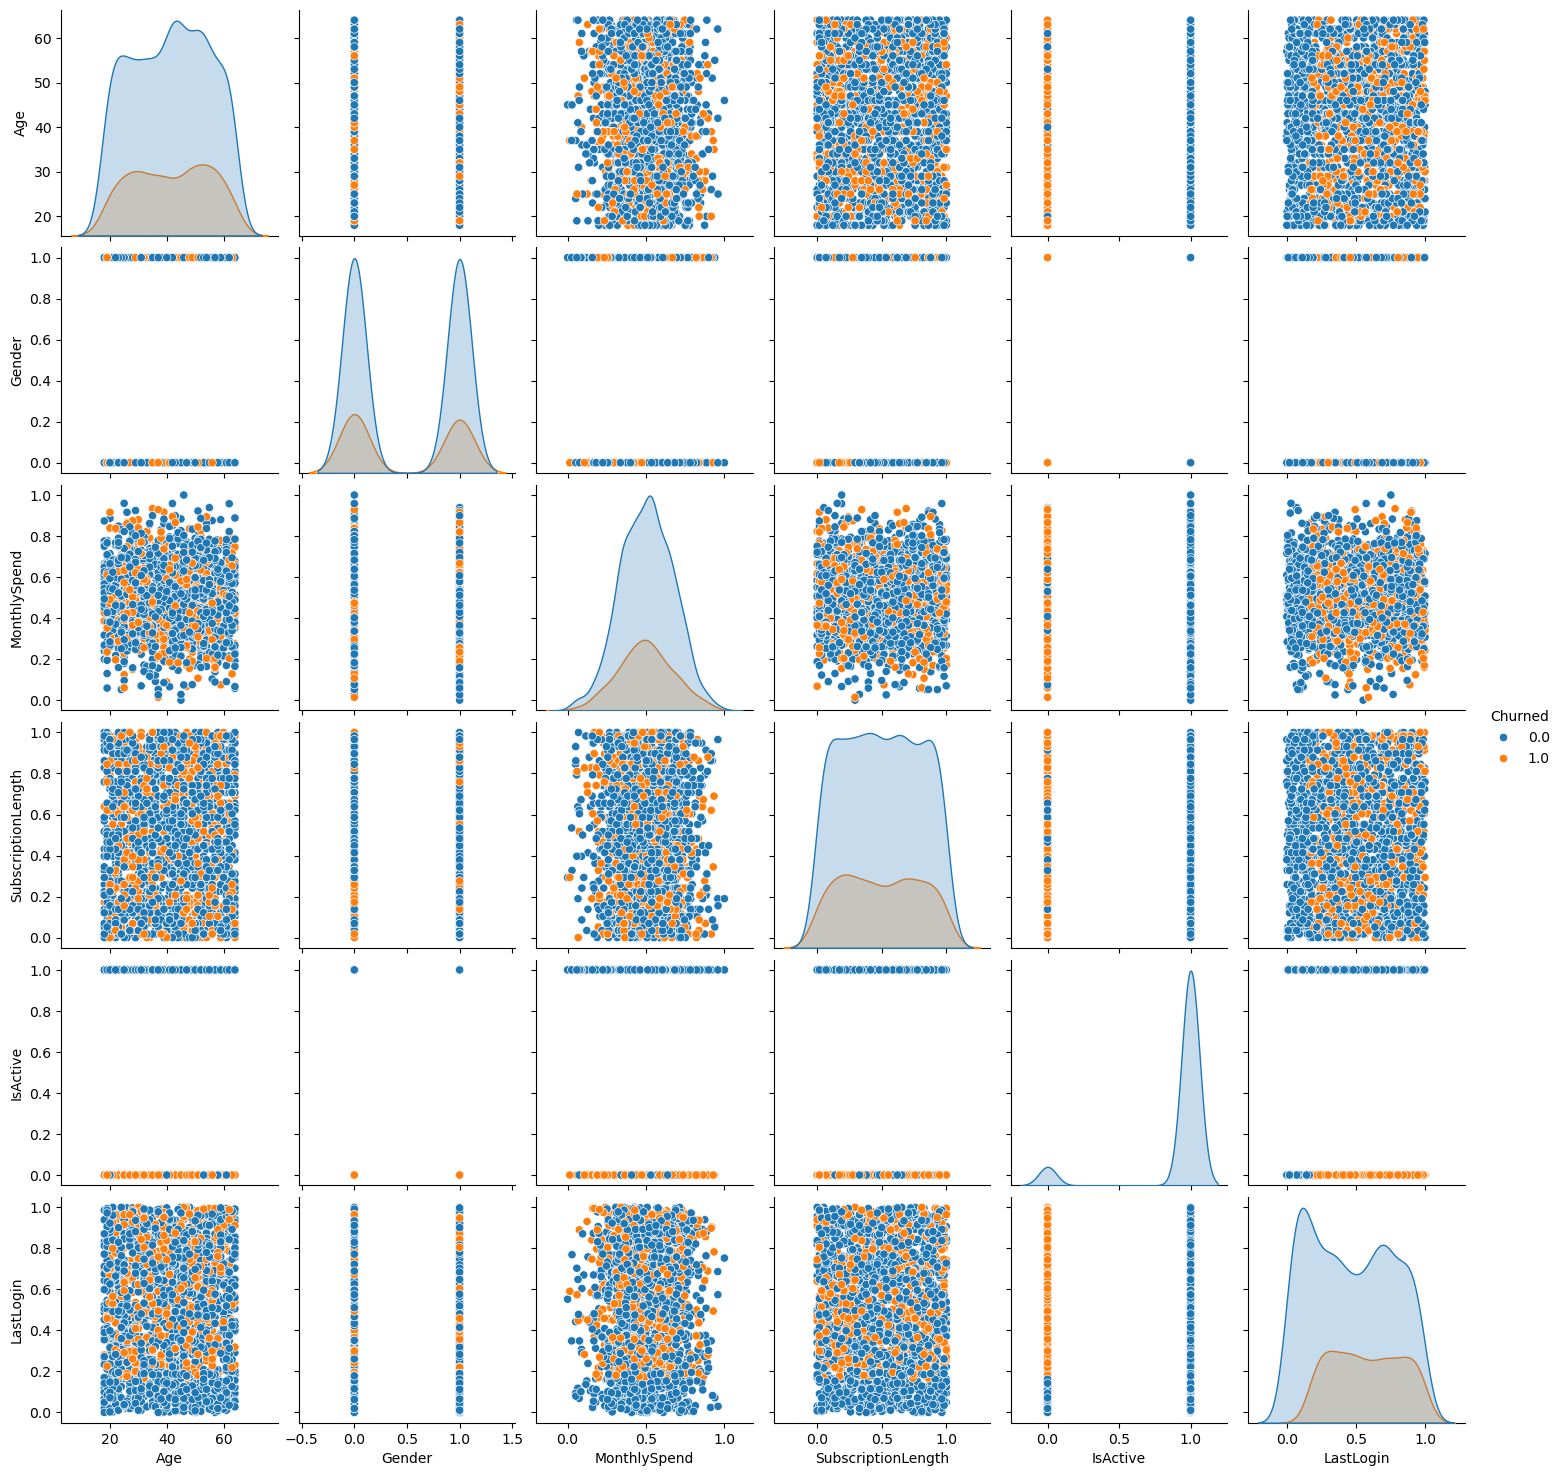

In [104]:
# check the relationship
sns.pairplot(data=normalize_dataset, hue="Churned")
plt.show()

In [105]:
# in the above graph you could see the data is not linear, and its classified so we'll use the logistic regression in this

## Applying the Logistic Regression

In [106]:
lr = LogisticRegression()

In [107]:
# train test and split the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [108]:
# now prepare and train the model

lr.fit(x_train, y_train)

LogisticRegression()

In [109]:
# now check the model accuracy 

lr.score(x_test, y_test)

0.9925

In [114]:
# not predict using some data

normalize_dataset.iloc[350,:]
#lr.predict([[]])

Age                   40.000000
Gender                 1.000000
MonthlySpend           0.510691
SubscriptionLength     0.603448
IsActive               1.000000
LastLogin              0.186813
Churned                0.000000
Name: 350, dtype: float64

In [115]:
# predict above data
lr.predict([normalize_dataset.iloc[350,:-1]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

# WoW its working fantastic